In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [59]:
data = pd.read_csv("./data/data.csv")
print(data.head())
data.info()
data.columns

   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH      

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [54]:
# Group the data by 'year' and calculate the mean only for numeric columns
year_data = data.select_dtypes(include=['float64', 'int64']).groupby('year').mean().reset_index()
year_data.head()

,year,valence,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,1921,0.379327,0.886896,0.418597,260537.166667,0.231815,0.046667,0.344878,5.093333,0.205710,-17.048667,0.673333,0.653333,0.073662,101.531493
1,1922,0.535549,0.938592,0.482042,165469.746479,0.237815,0.000000,0.434195,5.267606,0.240720,-19.275282,0.633803,0.140845,0.116655,100.884521
2,1923,0.625492,0.957247,0.577341,177942.362162,0.262406,0.000000,0.371733,4.810811,0.227462,-14.129211,0.789189,5.389189,0.093949,114.010730
3,1924,0.663725,0.940200,0.549894,191046.707627,0.344347,0.000000,0.581701,5.648305,0.235219,-14.231343,0.754237,0.661017,0.092089,120.689572
4,1925,0.621929,0.962607,0.573863,184986.924460,0.278594,0.000000,0.418297,5.107914,0.237668,-14.146414,0.730216,2.604317,0.111918,115.521921


In [17]:
def determine_column_counts(df):
    columns = df.columns
    columns = columns.drop('id')
    data_counts = pd.DataFrame(columns = ['column_name','column_type','num_rows','distinct_data', 'distinct_percent', 'missing_data', 'missing_percentage'])
    
    #For each column, calculate number and percentage of missing rows and distinct counts
    for col in columns :
        col_vals = df[col]
        total_data = len(col_vals)
        col_missing = sum(col_vals.isnull())
        missing_percent = round((col_missing / len(df[col])) * 100 , 3)
        col_distinct = (col_vals.nunique())
        distinct_percent = round((col_distinct / len(df[col])) * 100 , 3)

        data_counts.loc[len(data_counts)] = [col, col_vals.dtype, total_data, col_distinct, distinct_percent, col_missing, missing_percent]
        
    return(data_counts)

missing_data = determine_column_counts(data)
missing_data

,column_name,column_type,num_rows,distinct_data,distinct_percent,missing_data,missing_percentage
0,valence,float64,170653,1733,1.016,0,0.0
1,year,int64,170653,100,0.059,0,0.0
2,acousticness,float64,170653,4689,2.748,0,0.0
3,artists,object,170653,34088,19.975,0,0.0
4,danceability,float64,170653,1240,0.727,0,0.0
5,duration_ms,int64,170653,51755,30.328,0,0.0
6,energy,float64,170653,2332,1.367,0,0.0
7,explicit,int64,170653,2,0.001,0,0.0
8,instrumentalness,float64,170653,5401,3.165,0,0.0
9,key,int64,170653,12,0.007,0,0.0


There is no missing data present within the dataset, with 170653 rows. 

There are a few columns with only a couple distinct values - explicity and mode both only have two distinct values. 

Name, tempo, duration_ms have the highest percent of distinct data

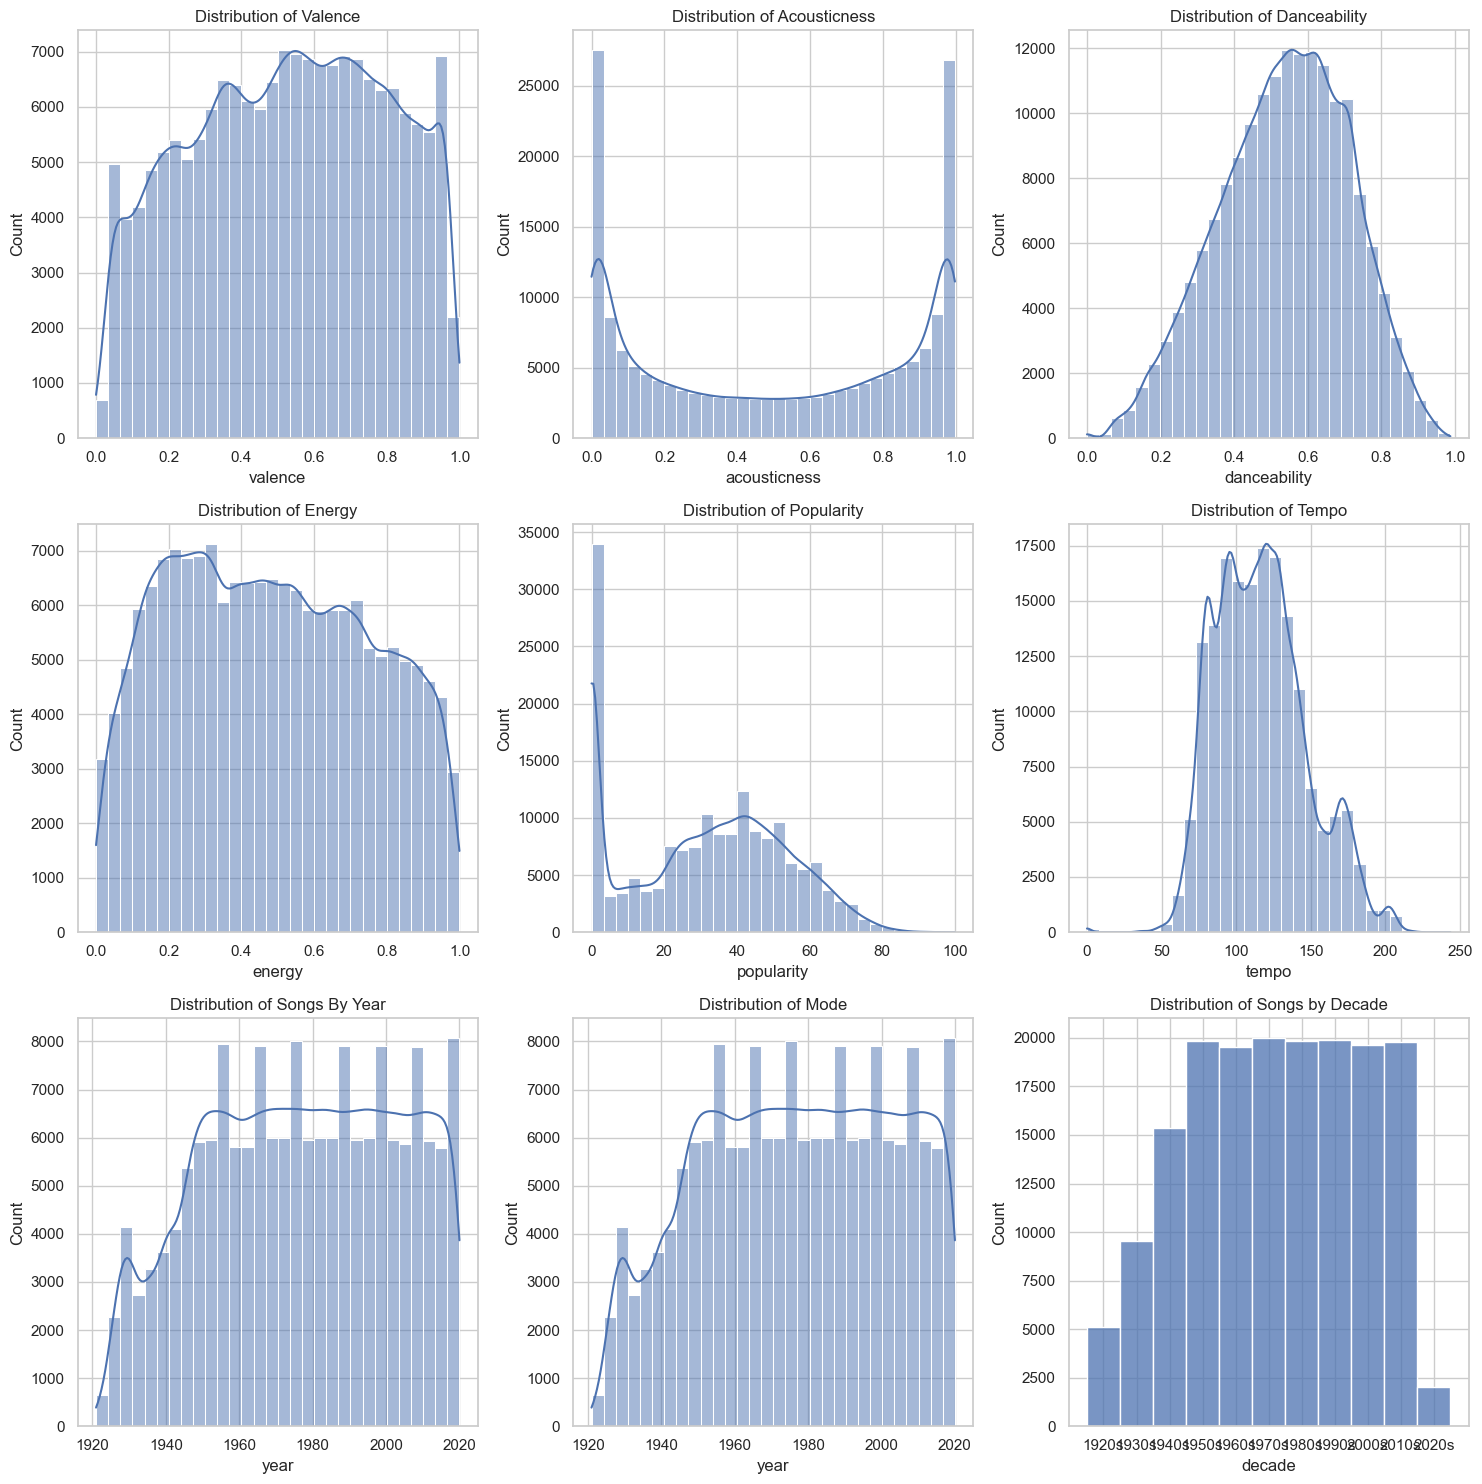

In [86]:
# Setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting distributions of some key features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Valence distribution
sns.histplot(data['valence'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Valence')

# Acousticness distribution
sns.histplot(data['acousticness'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Acousticness')

# Danceability distribution
sns.histplot(data['danceability'], bins=30, kde=True, ax=axes[0,2])
axes[0,2].set_title('Distribution of Danceability')

# Energy distribution
sns.histplot(data['energy'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Energy')

# Popularity distribution
sns.histplot(data['popularity'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Popularity')

# Tempo distribution
sns.histplot(data['tempo'], bins=30, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Tempo')


# Year distribution
sns.histplot(data['year'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Songs By Year')

# Mode distribution
sns.histplot(data['year'], bins=30, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Mode')

data['decade'] = data['year'].apply(lambda year : f'{(year//10)*10}s' )
sns.histplot(data['decade'], bins=30,  ax=axes[2, 2])
axes[2, 2].set_title('Distribution of Songs by Decade')

plt.tight_layout()
plt.show()


Distribution of Valence: Peaks in the mid-range, suggesting that most songs have moderate levels of musical positiveness.

Distribution of Acousticness: Shows a U-shaped distribution, indicating that songs are typically either highly acoustic or not at all.

Distribution of Danceability: Follows a bell-shaped curve centered around 0.5 to 0.7, implying most songs are moderately danceable.

Distribution of Energy: Also centers around a moderate level, suggesting that most songs have a balanced energy level.

Distribution of Popularity: Heavily skewed towards lower values, indicating that most songs have low popularity scores.

Distribution of Tempo: Shows a bell-shaped distribution with a peak around 120 BPM, suggesting that this is the most common tempo for songs.

Distribution of Songs by Year: Increases over time, particularly after 1960, indicating a growing number of songs being produced or recorded in databases.

Distribution of Mode: Shows a preference for one mode over the other, indicating a commonality in the modal structure of songs, with a majority likely being in a major key given the two distinct peaks.

Distribution of Songs by Decade: There's a noticeable increase in song counts beginning in the 1950s, with each subsequent decade having more songs than the last, peaking in the 2000s. The count for the 2010s appears slightly lower than the 2000s, but it's still significantly higher than in earlier decades. This could be due to various factors including the increase in music production, distribution channels, and changes in recording technologies.

/var/folders/20/6gd3bgbx1kn0xfsyzbfxk8nm0000gn/T/ipykernel_5330/998838281.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(ax=axes[0, 1], data=data, x='year', y='popularity', ci=None)
/Users/sameeraboppana/work_env/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


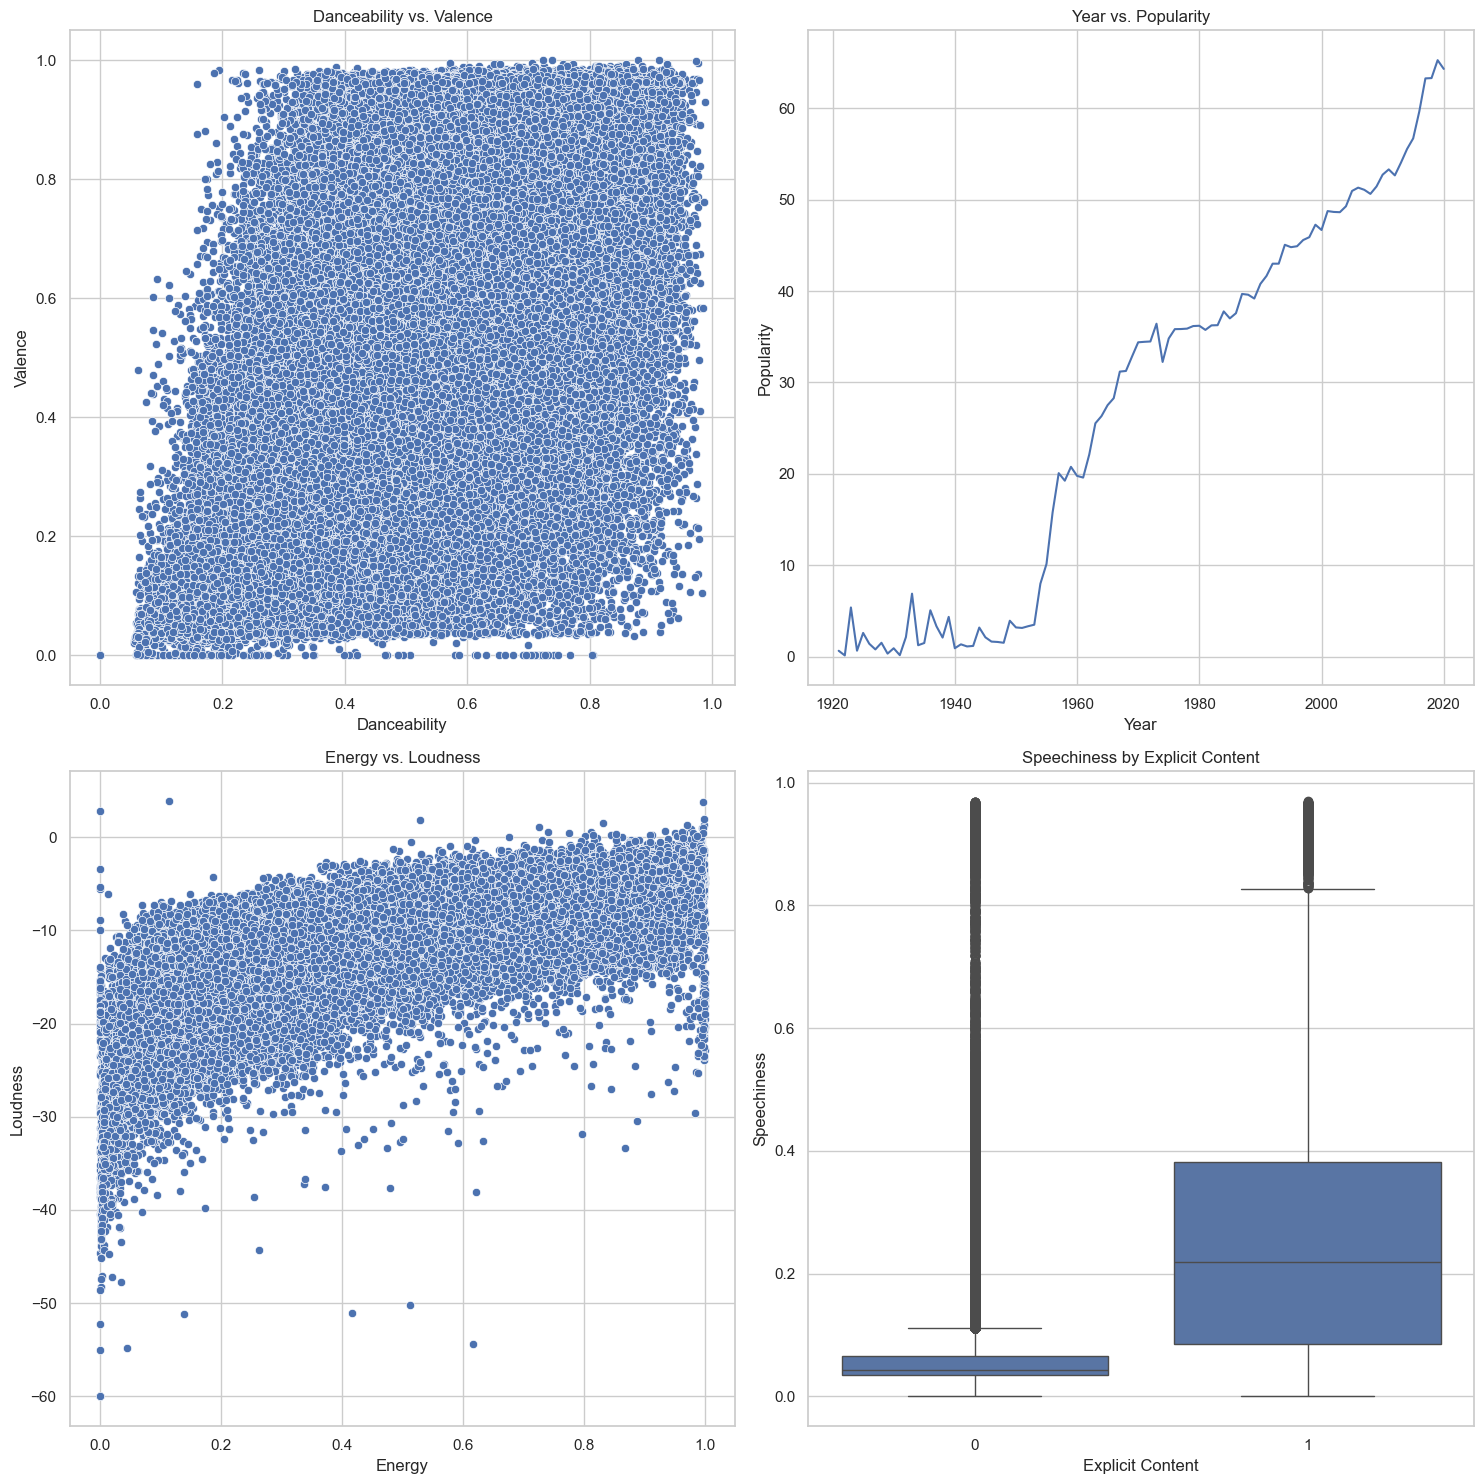

In [43]:


# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # 3 Rows, 2 Columns

# Danceability vs. Valence
sns.scatterplot(ax=axes[0, 0], data=data, x='danceability', y='valence')
axes[0, 0].set_title('Danceability vs. Valence')
axes[0, 0].set_xlabel('Danceability')
axes[0, 0].set_ylabel('Valence')

# Year vs. Popularity
sns.lineplot(ax=axes[0, 1], data=data, x='year', y='popularity', ci=None)
axes[0, 1].set_title('Year vs. Popularity')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Popularity')

# Energy vs. Loudness
sns.scatterplot(ax=axes[1, 0], data=data, x='energy', y='loudness')
axes[1, 0].set_title('Energy vs. Loudness')
axes[1, 0].set_xlabel('Energy')
axes[1, 0].set_ylabel('Loudness')


# Speechiness vs. Explicit
sns.boxplot(ax=axes[1, 1], data=data, x='explicit', y='speechiness')
axes[1, 1].set_title('Speechiness by Explicit Content')
axes[1, 1].set_xlabel('Explicit Content')
axes[1, 1].set_ylabel('Speechiness')



# Adjust layout
plt.tight_layout()
plt.show()


Danceability vs. Valence: Shows no clear correlation between how danceable a song is and its positivity level. The data is spread evenly across all values.

Year vs. Popularity: Indicates a significant increase in song popularity from the 1960s to the present, with a particularly sharp rise in recent years.

Energy vs. Loudness: Demonstrates a positive relationship, with more energetic songs generally being louder.

Speechiness by Explicit Content: Reveals that explicit songs tend to have a higher range and median of speechiness compared to non-explicit songs.





In [55]:

# Now 'year' should be one of the columns, so we can use it in the plot
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades')

# Show the plot
fig.show()


The chart indicates significant changes in the acousticness and instrumentalness of music over time, while other features like danceability, energy, liveness, and valence have shown more stability or minor fluctuations.






In [80]:
artists = pd.read_csv("data/data_by_artist.csv")
artists

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,1,2,0.512000,麥志誠,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10
28676,0,2,0.541000,黃品源,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9
28677,1,11,0.785455,黃國隆,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5
28678,1,2,0.381000,黑豹,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11


In [83]:
top10_popular_artists = artists.nlargest(10, 'popularity')
top10_most_song_produced_artists = artists.nlargest(10, 'count')
print('Top 10 Artists that produced most songs:')
top10_most_song_produced_artists[['count','artists']].sort_values('count',ascending=False)

Top 10 Artists that produced most songs:


,count,artists
8367,3169,Francisco Canaro
28561,2422,Эрнест Хемингуэй
28560,2136,Эрих Мария Ремарк
8434,1459,Frank Sinatra
10714,1256,Ignacio Corsini
27109,1200,Vladimir Horowitz
1682,1146,Arturo Toscanini
2707,1103,Billie Holiday
12378,1061,Johnny Cash
7426,1023,Elvis Presley


In [84]:

print('Top 10 Artists that had most popularity score:')
top10_popular_artists[['popularity','artists']].sort_values('popularity',ascending=False)

Top 10 Artists that had most popularity score:


,popularity,artists
20966,93.0,Ritt Momney
14354,92.0,Lele Pons
15070,90.0,Los Legendarios
11764,89.0,Jerry Di
7463,88.0,Emilee
23687,88.0,Surf Mesa
28263,88.0,salem ilese
213,87.0,A7S
2343,86.0,Beltito
14378,86.0,Lenny Santos
